>It is no longer difficult to understand what people think about a topic by analysing the tweets shared by people.
Sentiment analysis is one of the most popular use cases for NLP (Natural Language Processing).
The aim of this project is to analyse what people think about covid vaccines.

### Step 1: Install and Import Libraries
First, we need to import some libraries that will help us collect twitter data and analyze sentiments.

In [26]:
!pip install bokeh

In [162]:
# Import Libraries

import sys
import os
import nltk
import pycountry

import tweepy # for tweet mining
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations. Pandas is built on Numpy
import csv # to read and write csv files
import re # In-built regular expressions library
import string # Inbuilt string library
import glob # to retrieve files/pathnames matching a specified pattern. 
import random # generating random numbers
import requests # to send HTTP requests
from PIL import Image # for opening, manipulating, and saving many different image file f
import matplotlib.pyplot as plt # for plotting

# Natural Language Processing Toolkit
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords, words # get stopwords from NLTK library & get all words in english language
from nltk.tokenize import word_tokenize # to create word tokens
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk import pos_tag # For Parts of Speech tagging

# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud, STOPWORDS

from textblob import TextBlob # TextBlob - Python library for processing textual data




### Step 2: Authentication for Twitter API

In [164]:
# 1. Create an OAuthHandler instance into which you will pass your consumer key and secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# 2. Set up your access token so you do not need to re-fetch it each time you make a request
auth.set_access_token(access_token, access_secret)


In [165]:
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [166]:
user = api.me()

### Step 3: Getting Tweets With Keyword or Hashtag

In [168]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))



Please enter keyword or hashtag to search: #Covidvaccines
Please enter how many tweets to analyze: 100


In [169]:
tweets = [tweet for tweet in tweepy.Cursor(api.search,q=keyword, tweet_mode='extended').items(noOfTweet)]

In [170]:
tweets

[Status(_api=<tweepy.api.API object at 0x0000024BF15B8748>, _json={'created_at': 'Mon Feb 08 11:29:18 +0000 2021', 'id': 1358739679722496001, 'id_str': '1358739679722496001', 'full_text': 'Well done to our amazing teams across Norfolk and North Suffolk who despite the harsh weather, continued to provide #CovidVaccines to the four priority groups over the weekend. \n\n👏👏👏👏\n\nRead the full story here: https://t.co/F4sGUui6Zu\n\n@NHSNWCCG @NHSEngland https://t.co/wCJifmkMMT', 'truncated': False, 'display_text_range': [0, 257], 'entities': {'hashtags': [{'text': 'CovidVaccines', 'indices': [116, 130]}], 'symbols': [], 'user_mentions': [{'screen_name': 'NHSNWCCG', 'name': '@NHSNWCCG', 'id': 37881996, 'id_str': '37881996', 'indices': [236, 245]}, {'screen_name': 'NHSEngland', 'name': 'NHS England and NHS Improvement', 'id': 551426814, 'id_str': '551426814', 'indices': [246, 257]}], 'urls': [{'url': 'https://t.co/F4sGUui6Zu', 'expanded_url': 'https://www.lowestoftjournal.co.uk/news/lowestoft

In [171]:
len(tweets)

100

In [172]:
for tweet in tweets :
    tweet_id = tweet.id
    created_at = tweet.created_at
    text = tweet.full_text
    location = tweet.user.location
    retweet = tweet.retweet_count
    favorite = tweet.favorite_count
    with open('covidvaccines.csv', 'a', newline='', encoding='utf-8') as csvFile:
        csv_writer = csv.writer(csvFile, delimiter=',')
        csv_writer.writerow([tweet_id, created_at, text, location, retweet, favorite])


          

In [173]:
tweet_df = pd.read_csv('covidvaccines.csv' , index_col=None, header=None)
tweet_df.columns = ['tweet_id', 'created_at', 'text', 'location', 'retweet', 'favorite']
tweet_df.head()

tweet_id           created_at  \
0  1358521395534258182  2021-02-07 21:01:55   
1  1358519320394031114  2021-02-07 20:53:40   
2  1358518452496048128  2021-02-07 20:50:13   
3  1358518227173793793  2021-02-07 20:49:20   
4  1358517828538699776  2021-02-07 20:47:45   

                                                text  \
0  RT @NHSEngland: More than 10 million #COVIDVac...   
1  RT @Lkern12: Thank you to the amazing @HealthP...   
2  Received my first dose #CovidVaccines!  Thank ...   
3  RT @SmithWinstona: @TheEndisNigh10 @WitchEnd H...   
4  #COVID19 death statistics have been fudged wor...   

                      location  retweet  favorite  
0  Portadown, Northern Ireland      116         0  
1                          NaN        7         0  
2                          NaN        0         0  
3                      England        1         0  
4                          NaN        0         0

### Cleaning the data :
checking and removing duplicate values. It is also important to mention that the Tweet ID was considered as the Primary key for all the dataframe. We also replaced "NaN" values in Location column because if used for Location Geocoding, "NaN" values return Coordinates which should not be.

In [174]:
tweet_df.shape #Get number of rows and columns


(500, 6)

In [175]:
tweet_df.duplicated(subset='tweet_id').sum() # Check for duplicate values
tweet_df=tweet_df.drop_duplicates(subset=['tweet_id']) # drop duplicate values
tweet_df.shape # Check the shape after dropping duplicates


(220, 6)

In [176]:
tweet_df.isna().any() # Check for "NaN" values

tweet_id      False
created_at    False
text          False
location       True
retweet       False
favorite      False
dtype: bool

In [177]:
tweet_df['location']=tweet_df['location'].fillna('No location') # Replace "NaN" values with "No Location"
tweet_df.isna().any() # Check for "NaN" values again

tweet_id      False
created_at    False
text          False
location      False
retweet       False
favorite      False
dtype: bool

In [178]:
#Cleaning Text (RT, Punctuation etc)
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ',"",x)
rt = lambda x: re.sub("[^a-zA-Z0-9]"," ",x)
tweet_df["text"] = tweet_df["text"].map(remove_rt)
tweet_df["text"] = tweet_df["text"].map(rt)
tweet_df["text"] = tweet_df["text"].str.lower()
tweet_df.head(10)

tweet_id           created_at  \
0  1358521395534258182  2021-02-07 21:01:55   
1  1358519320394031114  2021-02-07 20:53:40   
2  1358518452496048128  2021-02-07 20:50:13   
3  1358518227173793793  2021-02-07 20:49:20   
4  1358517828538699776  2021-02-07 20:47:45   
5  1358516876310110209  2021-02-07 20:43:57   
6  1358515360782315524  2021-02-07 20:37:56   
7  1358514025156382720  2021-02-07 20:32:38   
8  1358513836018438144  2021-02-07 20:31:53   
9  1358513395230793729  2021-02-07 20:30:08   

                                                text  \
0  more than 10 million  covidvaccines have now b...   
1  thank you to the amazing  healthpasco staff   ...   
2  received my first dose  covidvaccines   thank ...   
3   theendisnigh10  witchend here s the latest st...   
4   covid19 death statistics have been fudged wor...   
5  covid 19 vaccination clinics  be organized  pr...   
6  so happy to help  thanks skin esteem med spa f...   
7  this is not good     covidvaccines https   t c...   
8              covidvaccines https   t co shxchm9mq8   
9   bogdanmaverick  erictopol why  nytimes articl...   

                      location  retweet  favorite  
0  Portadown, Northern Ireland      116         0  
1                  No location        7         0  
2                  No location        0         0  
3                      England        1         0  
4                  No location        0         0  
5                  No location        1         0  
6                  Duxbury, MA        0         0  
7              Alberta Canada         0         0  
8              Alberta Canada         0         0  
9               İzmir, Türkiye        0         1

### Sentiment analysis
Now, we can use cleaned text to calculate polarity, subjectivity, sentiment, negative, positive, neutral and compound parameters. For all calculated parameters, we create new features to our data frame


In [124]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [179]:
positive = 0
negative = 0
neutral = 0
polarity = 0
neutral_list = []
negative_list = []
positive_list = []

for i in range(len(tweet_df["text"])):
    analysis = TextBlob(tweet_df.loc[i,"text"])
    score = SentimentIntensityAnalyzer().polarity_scores(tweet_df.loc[i,"text"])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet_df.loc[i,"text"])
        tweet_df.loc[i, 'sentiment'] = 'negative'
        negative = negative+1
        
    elif pos > neg:
        positive_list.append(tweet_df.loc[i,"text"])
        tweet_df.loc[i, 'sentiment'] = 'positive'
        positive = positive+1
 
    elif pos == neg:
        neutral_list.append(tweet_df.loc[i,"text"])
        tweet_df.loc[i, 'sentiment'] = 'neutral'
        neutral = neutral+1

KeyError: 100

In [180]:
tweet_df.head(10)

tweet_id           created_at  \
0  1358521395534258182  2021-02-07 21:01:55   
1  1358519320394031114  2021-02-07 20:53:40   
2  1358518452496048128  2021-02-07 20:50:13   
3  1358518227173793793  2021-02-07 20:49:20   
4  1358517828538699776  2021-02-07 20:47:45   
5  1358516876310110209  2021-02-07 20:43:57   
6  1358515360782315524  2021-02-07 20:37:56   
7  1358514025156382720  2021-02-07 20:32:38   
8  1358513836018438144  2021-02-07 20:31:53   
9  1358513395230793729  2021-02-07 20:30:08   

                                                text  \
0  more than 10 million  covidvaccines have now b...   
1  thank you to the amazing  healthpasco staff   ...   
2  received my first dose  covidvaccines   thank ...   
3   theendisnigh10  witchend here s the latest st...   
4   covid19 death statistics have been fudged wor...   
5  covid 19 vaccination clinics  be organized  pr...   
6  so happy to help  thanks skin esteem med spa f...   
7  this is not good     covidvaccines https   t c...   
8              covidvaccines https   t co shxchm9mq8   
9   bogdanmaverick  erictopol why  nytimes articl...   

                      location  retweet  favorite sentiment  
0  Portadown, Northern Ireland      116         0  positive  
1                  No location        7         0  positive  
2                  No location        0         0  positive  
3                      England        1         0  negative  
4                  No location        0         0  negative  
5                  No location        1         0  positive  
6                  Duxbury, MA        0         0  positive  
7              Alberta Canada         0         0  negative  
8              Alberta Canada         0         0   neutral  
9               İzmir, Türkiye        0         1   neutral

In [22]:
#Number of Tweets (Total, Positive, Negative, Neutral)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_df["text"]))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  27
negative number:  47
neutral number:  26


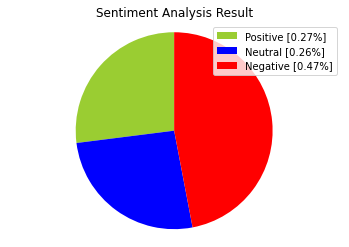

In [23]:
#Creating PieCart
labels = ['Positive ['+str(len(positive_list)/len(tweet_df["text"]))+'%]' , 'Neutral ['+str(len(neutral_list)/len(tweet_df["text"]))+'%]','Negative ['+str(len(negative_list)/len(tweet_df["text"]))+'%]']
sizes = [len(positive_list), len(neutral_list), len(negative_list)]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result')
plt.axis('equal')
plt.show()

In [24]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open("corona_mask.jpg"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",mask = mask,max_words=3500, repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


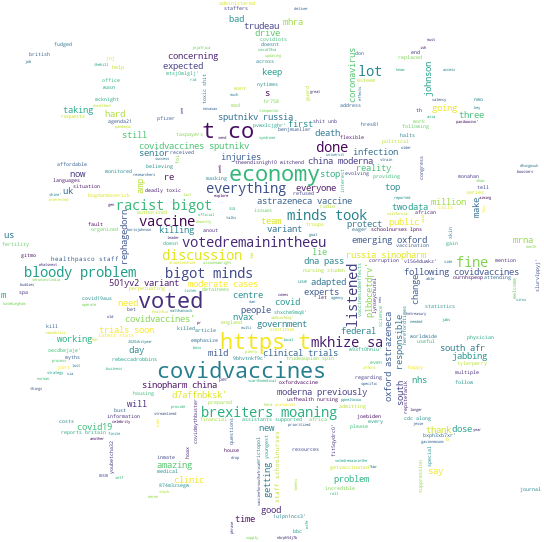

In [25]:
#Creating wordcloud for all tweets
create_wordcloud(tweet_df["text"].values)

### Data visualization

percentage of negative/positive/neutral by location

In [181]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral3

we notice that among the first 20 most cited locations, there are several duplicates.
We will group the locations according to the country to which they belong.

In [182]:
#The most cited locations
df=tweet_df["location"].value_counts().head(20)
df=df[1:]
df

South Africa                  6
Johannesburg                  6
Johannesburg, South Africa    5
UK                            3
Cape Town, South Africa       3
Scotland                      3
                              2
London, England               2
Alberta Canada                2
Lincoln, Nebraska, USA        2
Cape Town                     2
India                         2
Ireland                       2
Mumbai, India                 2
England                       2
World  citizen                2
Darnall, Sheffield, S9        2
Charybdis Brecani             1
Minnesota                     1
Name: location, dtype: int64

In [183]:
#we keep only the tweets from the locations above
filter = tweet_df["location"].isin(('Johannesburg','Johannesburg, South Africa','South Africa','Ireland','Canada','Toronto, Ontario','Toronto','India', 'London, UK','London','England, United Kingdom','London, England', 'Los Angeles, CA','United States','Boston, MA','Washington, DC','Baltimore, MD USA'))
tweet_df= tweet_df[filter]
tweet_df

tweet_id           created_at  \
10   1358513127474667521  2021-02-07 20:29:04   
19   1358509443013574659  2021-02-07 20:14:25   
23   1358508305036029954  2021-02-07 20:09:54   
30   1358504109876387840  2021-02-07 19:53:14   
47   1358488167310049285  2021-02-07 18:49:53   
50   1358487530157596673  2021-02-07 18:47:21   
52   1358486849266847747  2021-02-07 18:44:38   
55   1358486246423744512  2021-02-07 18:42:15   
62   1358476350902964224  2021-02-07 18:02:55   
200  1358721586627563520  2021-02-08 10:17:24   
201  1358721232292614144  2021-02-08 10:16:00   
215  1358694558662418432  2021-02-08 08:30:00   
216  1358694405822173186  2021-02-08 08:29:24   
232  1358673347731742726  2021-02-08 07:05:43   
241  1358653032704012289  2021-02-08 05:45:00   
243  1358641137242820608  2021-02-08 04:57:44   
244  1358638443430092802  2021-02-08 04:47:01   
251  1358628613051060225  2021-02-08 04:07:58   
252  1358626611663413249  2021-02-08 04:00:00   
265  1358581310076387333  2021-02-08 01:00:00   
292  1358524841498980352  2021-02-07 21:15:37   
294  1358523695933890564  2021-02-07 21:11:03   
401  1358737977795612674  2021-02-08 11:22:32   
408  1358734810697506817  2021-02-08 11:09:57   
414  1358733546442133505  2021-02-08 11:04:56   
420  1358726137392877568  2021-02-08 10:35:29   

                                                  text  \
10               covidvaccines https   t co mtsj0mlglj   
19    mkhize  sa is in discussion with the followin...   
23     emerging   oxford astrazeneca vaccine does n...   
30    mkhize  sa is in discussion with the followin...   
47    mkhize  sa is in discussion with the followin...   
50   good news is  two or three vaccines that have ...   
52    mkhize  sa is in discussion with the followin...   
55    mkhize  sa is in discussion with the followin...   
62   good news is  two or three vaccines that have ...   
200   covidvaccines are already bringing hope to ou...   
201   covidvaccines are already bringing hope to ou...   
215  how will we know our  covidvaccines are real  ...   
216  good news is  two or three vaccines that have ...   
232  good news is  two or three vaccines that have ...   
241  india dispatched two consignments of covishiel...   
243   mkhize  sa is in discussion with the followin...   
244  all  covidvaccines will be free  we tell you w...   
251   mkhize  sa is in discussion with the followin...   
252  all  covidvaccines will be free  we tell you w...   
265  customs  warehouses  labs  we lay out the jour...   
292  as such sa will suspend its roll out until the...   
294   mkhize  sa is in discussion with the followin...   
401  the approved  covidvaccines do not contain any...   
408  the approved  covidvaccines do not contain any...   
414  the approved  covidvaccines do not contain any...   
420   employers could insist all staff get vaccinat...   

                       location  retweet  favorite sentiment  
10                United States        0         0   neutral  
19                 South Africa       13         0   neutral  
23                       Canada        4         5  negative  
30                 South Africa       13         0   neutral  
47                 South Africa       13         0   neutral  
50                 Johannesburg        2         0  positive  
52   Johannesburg, South Africa       13         0   neutral  
55   Johannesburg, South Africa       13        12  positive  
62   Johannesburg, South Africa        2         0  positive  
200                     Ireland        1         0       NaN  
201                     Ireland        1         4       NaN  
215                Johannesburg        3         1       NaN  
216                Johannesburg        8         0       NaN  
232                South Africa        8         0       NaN  
241                       India        4         5       NaN  
243                South Africa       24         0       NaN  
244                Johannesburg        3         0    

In [184]:
tweet_df.loc[tweet_df.location == 'Johannesburg' , 'location'] = 'South Africa'
tweet_df.loc[tweet_df.location == 'Johannesburg, South Africa' , 'location'] = 'South Africa'
tweet_df.loc[tweet_df.location == 'Toronto, Ontario' , 'location'] = 'Canada'
tweet_df.loc[tweet_df.location == 'Toronto' , 'location'] = 'Canada'
tweet_df.loc[tweet_df.location == 'London, UK' , 'location'] = 'England'
tweet_df.loc[tweet_df.location == 'London' , 'location'] = 'England'
tweet_df.loc[tweet_df.location == 'England, United Kingdom' , 'location'] = 'England'
tweet_df.loc[tweet_df.location == 'London, England' , 'location'] = 'England'
tweet_df.loc[tweet_df.location == 'Los Angeles, CA' , 'location'] = 'United States'
tweet_df.loc[tweet_df.location == 'Boston, MA' , 'location'] = 'United States'
tweet_df.loc[tweet_df.location == 'Washington, DC' , 'location'] = 'United States'
tweet_df.loc[tweet_df.location == 'Baltimore, MD USA' , 'location'] = 'United States'

C:\Users\A002\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [185]:
tweet_df

tweet_id           created_at  \
10   1358513127474667521  2021-02-07 20:29:04   
19   1358509443013574659  2021-02-07 20:14:25   
23   1358508305036029954  2021-02-07 20:09:54   
30   1358504109876387840  2021-02-07 19:53:14   
47   1358488167310049285  2021-02-07 18:49:53   
50   1358487530157596673  2021-02-07 18:47:21   
52   1358486849266847747  2021-02-07 18:44:38   
55   1358486246423744512  2021-02-07 18:42:15   
62   1358476350902964224  2021-02-07 18:02:55   
200  1358721586627563520  2021-02-08 10:17:24   
201  1358721232292614144  2021-02-08 10:16:00   
215  1358694558662418432  2021-02-08 08:30:00   
216  1358694405822173186  2021-02-08 08:29:24   
232  1358673347731742726  2021-02-08 07:05:43   
241  1358653032704012289  2021-02-08 05:45:00   
243  1358641137242820608  2021-02-08 04:57:44   
244  1358638443430092802  2021-02-08 04:47:01   
251  1358628613051060225  2021-02-08 04:07:58   
252  1358626611663413249  2021-02-08 04:00:00   
265  1358581310076387333  2021-02-08 01:00:00   
292  1358524841498980352  2021-02-07 21:15:37   
294  1358523695933890564  2021-02-07 21:11:03   
401  1358737977795612674  2021-02-08 11:22:32   
408  1358734810697506817  2021-02-08 11:09:57   
414  1358733546442133505  2021-02-08 11:04:56   
420  1358726137392877568  2021-02-08 10:35:29   

                                                  text       location  \
10               covidvaccines https   t co mtsj0mlglj  United States   
19    mkhize  sa is in discussion with the followin...   South Africa   
23     emerging   oxford astrazeneca vaccine does n...         Canada   
30    mkhize  sa is in discussion with the followin...   South Africa   
47    mkhize  sa is in discussion with the followin...   South Africa   
50   good news is  two or three vaccines that have ...   South Africa   
52    mkhize  sa is in discussion with the followin...   South Africa   
55    mkhize  sa is in discussion with the followin...   South Africa   
62   good news is  two or three vaccines that have ...   South Africa   
200   covidvaccines are already bringing hope to ou...        Ireland   
201   covidvaccines are already bringing hope to ou...        Ireland   
215  how will we know our  covidvaccines are real  ...   South Africa   
216  good news is  two or three vaccines that have ...   South Africa   
232  good news is  two or three vaccines that have ...   South Africa   
241  india dispatched two consignments of covishiel...          India   
243   mkhize  sa is in discussion with the followin...   South Africa   
244  all  covidvaccines will be free  we tell you w...   South Africa   
251   mkhize  sa is in discussion with the followin...   South Africa   
252  all  covidvaccines will be free  we tell you w...   South Africa   
265  customs  warehouses  labs  we lay out the jour...   South Africa   
292  as such sa will suspend its roll out until the...   South Africa   
294   mkhize  sa is in discussion with the followin...   South Africa   
401  the approved  covidvaccines do not contain any...        England   
408  the approved  covidvaccines do not contain any...          India   
414  the approved  covidvaccines do not contain any...        England   
420   employers could insist all staff get vaccinat...        England   

     retweet  favorite sentiment  
10         0         0   neutral  
19        13         0   neutral  
23         4         5  negative  
30        13         0   neutral  
47        13         0   neutral  
50         2         0  positive  
52        13         0   neutral  
55        13        12  positive  
62         2         0  positive  
200        1         0       NaN  
201        1         4       NaN  
215        3         1       NaN  
216        8         0       NaN  
232        8         0       NaN  
241        4         5       NaN  
243       24         0       NaN  
244        3         0       NaN  
251       24         0       NaN  
252        3         0       NaN  
265        0        

In [186]:
tweet_df["location"].value_counts()

South Africa     17
England           3
India             2
Ireland           2
Canada            1
United States     1
Name: location, dtype: int64

In [187]:
tweet_df["positive"]=0
tweet_df["negative"]=0
tweet_df["neutral"]=0
tweet_df.loc[tweet_df.sentiment == 'positive', 'positive'] = 1
tweet_df.loc[tweet_df.sentiment == 'negative', 'negative'] = 1
tweet_df.loc[tweet_df.sentiment == 'neutral', 'neutral'] = 1

C:\Users\A002\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\A002\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\A002\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [188]:
grouped = tweet_df.groupby('location')['positive', 'negative', 'neutral'].sum()

C:\Users\A002\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [189]:
grouped 

positive  negative  neutral
location                                  
Canada                0         1        0
England               0         0        0
India                 0         0        0
Ireland               0         0        0
South Africa          3         0        4
United States         0         0        1

In [190]:
source = ColumnDataSource(grouped)
countries = source.data['location'].tolist()
p = figure(x_range=countries)

In [191]:
p.vbar_stack(stackers=['positive', 'negative', 'neutral'],
             x='location', source=source,
             width=0.5, color=Spectral3)
p.title.text ='positive/negative/neutral per country'
p.legend.location = 'top_left'
p.xaxis.axis_label = 'Country'
p.xgrid.grid_line_color = None	#remove the x grid lines
p.yaxis.axis_label = 'positive/negative/neutral'
show(p)

C:\Users\A002\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\bokeh\models\plots.py:766: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


### Data Security

In [156]:
!pip install pycryptodomex

In [202]:
from cryptography.fernet import Fernet
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms,modes

from cryptography.hazmat.backends import default_backend

In [222]:
for tweet in tweets :
    
    tweet_id = tweet.id
    text = tweet.full_text
    with open('covidtweet.csv', 'a', newline='', encoding='utf-8') as csvFile:
        csv_writer = csv.writer(csvFile, delimiter=',')
        csv_writer.writerow([tweet_id, text])

In [231]:
def write_key():
    """
    Generates the key and save it separetly
    """
    key = Fernet.generate_key()
    
    with open("key.key", "wb") as key_file:
        key_file.write(key)
        
        
def load_key():
    """
    Loads the key from the current directory
    """
    return open("key.key", "rb").read()



def encrypt(filename, key):
    """
    Given a filename (str) and key (bytes), it encrypts the file and write it
    """
    f = Fernet(key)
    with open(filename, "rb") as file:
        # read all file data
        file_data = file.read()
    
    encrypted_data = f.encrypt(file_data)
        
    with open(filename, "wb") as file:
        file.write(encrypted_data)

        
def decrypt(filename, key):
    """
    Given a filename (str) and key (bytes), it decrypts the file and write it
    """
    f = Fernet(key)
    with open(filename, "rb") as file:
        # read the encrypted data
        encrypted_data = file.read()
    # decrypt data
    decrypted_data = f.decrypt(encrypted_data)
    # write the original file
    with open(filename, "wb") as file:
        file.write(decrypted_data)        

In [224]:
write_key()
# load the key
key = load_key()

file = "covidtweet.csv"

encrypt(file, key)



**We can check the csv file to view the encrypted tweet**

In [225]:
vacc_tweet_df = pd.read_csv('covidtweet.csv' , index_col=None, header=None)
vacc_tweet_df.columns = ['text']

vacc_tweet_df

text
0  gAAAAABgITsMt1LQzfgGUGBGruzjSq6EcldVvUoOFoaDFz...

In [226]:
decrypt(file, key)


**We can check the csv file to view that it was decrypted**

In [228]:
vacc_tweet_df = pd.read_csv('covidtweet.csv' , index_col=None, header=None)

vacc_tweet_df

0                                                  1
0   1358739679722496001  Well done to our amazing teams across Norfolk ...
1   1358737977795612674  RT @WRES_team: The approved #COVIDVaccines do ...
2   1358737221709406208  RT @WRES_team: The approved #COVIDVaccines do ...
3   1358737131598999552  RT @WRES_team: The approved #COVIDVaccines do ...
4   1358735834468528128  RT @WRES_team: The approved #COVIDVaccines do ...
..                  ...                                                ...
95  1358561676254142464  RT @TheEMCMD: I'm no @Lin_Manuel but had to ta...
96  1358553139901784068  🚨South Africa suspends AstraZeneca vaccine dri...
97  1358552852491362305  RT @miamalan: #Mkhize: SA is in discussion wit...
98  1358552313565229056  RT @hewlett_angela: The barns used for the #Ne...
99  1358552016050663427  RT @hewlett_angela: The barns used for the #Ne...

[100 rows x 2 columns]